# Regresion Lineal : Costo de un incidente de seguridad 

En este ejercicio se explican los fundamentos de la regresion lineal aplicada a un caso sencillo relacionado con la Cyberseguridad

#### Enunciado del ejericicio.

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al numero de equipos afectados. El conjunto de datos es generado de manera aleatoria.

## 1.- Generacion del DataSet

In [1]:
import numpy as np 

x=2*np.random.rand(100,1)
y=4+3*x + np.random.randn(100,1)

print("La longitud del DataSet es ",len(x))

La longitud del DataSet es  100


## 2.- Visualizacion del DataSet

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

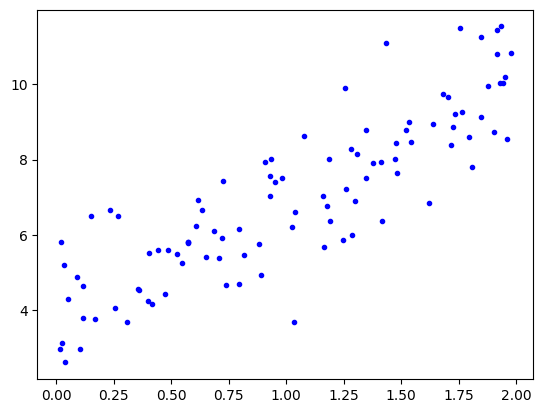

In [3]:
plt.plot(x,y,"b.")
plt.show()

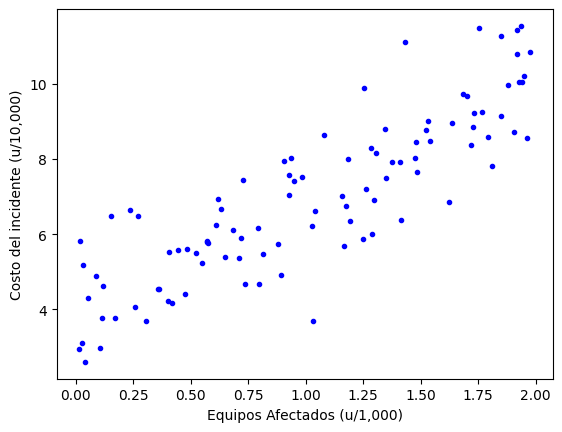

In [4]:
plt.plot(x,y,"b.")
plt.xlabel("Equipos Afectados (u/1,000)")
plt.ylabel('Costo del incidente (u/10,000)')
plt.show()

## 3.- Modificacion del DataSet

In [5]:
import pandas as pd

data = {'numero_de_equipos_afectados':x.flatten(),'Costo':y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,numero_de_equipos_afectados,Costo
0,0.737333,4.678258
1,0.725418,7.428815
2,0.399544,4.232978
3,1.935856,11.536519
4,0.235472,6.654850
5,0.708232,5.373243
6,0.719130,5.904946
7,0.170210,3.761578
8,1.809225,7.800436
9,1.717333,8.375653


In [6]:
# Escalando el numero de equipos afectados
df['numero_de_equipos_afectados'] = df['numero_de_equipos_afectados'] * 1000
df['numero_de_equipos_afectados'] = df['numero_de_equipos_afectados'].astype(int)
# Escalado del costo 
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype(int)

df.head(10)

,numero_de_equipos_afectados,Costo
0,737,46782
1,725,74288
2,399,42329
3,1935,115365
4,235,66548
5,708,53732
6,719,59049
7,170,37615
8,1809,78004
9,1717,83756


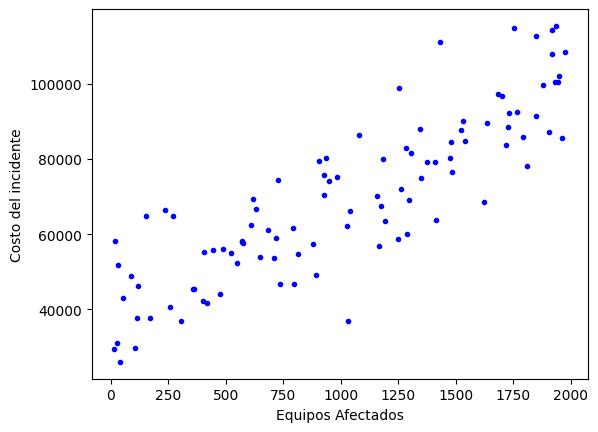

In [7]:
# Representacion grafica del DataSet 

plt.plot(df['numero_de_equipos_afectados'],df["Costo"],"b.")
plt.xlabel("Equipos Afectados")
plt.ylabel('Costo del incidente')
plt.show()


## 4.- Construccion del Modelo 

In [8]:
from sklearn.linear_model import LinearRegression


In [9]:
# Construcion del modelo y ajuste de la funcion de hipotesis

lin_reg = LinearRegression()
lin_reg.fit(df['numero_de_equipos_afectados'].values.reshape(-1,1),df['Costo'].values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Parametro Theta 0 (donde se intercepta la pendiente)
lin_reg.intercept_

np.float64(38044.64743282463)

In [11]:
# Parametro Theta 1 (coeficiente de correlacion)
lin_reg.coef_

array([31.03157353])

In [12]:
# Prediccion para el valor minimo y maxima del DataSet de entrenamiento
x_min_max = np.array([[df['numero_de_equipos_afectados'].min()],[df['numero_de_equipos_afectados'].max()]])
pred = lin_reg.predict(x_min_max)

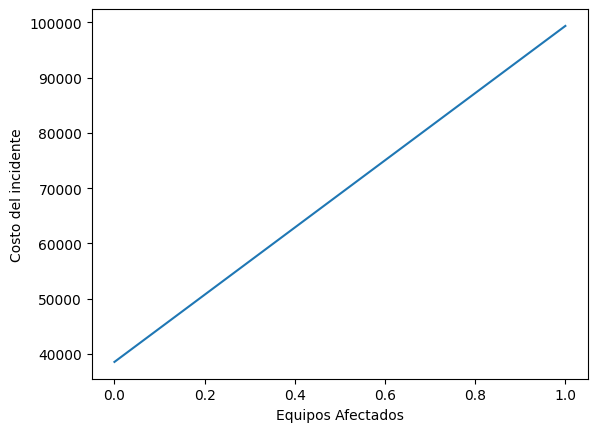

In [13]:
# Representacion grafica de la funcion de Hipotesis generada
plt.plot(pred)
plt.xlabel("Equipos Afectados")
plt.ylabel('Costo del incidente')
plt.show()